In [271]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline
#%load_ext cudf.pandas
#supercharges workflow with GPU acceleration using cudf.pandas
#Im having pip install issues with cudf so commenting it out for now

In [272]:
pandas_df = pd.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA21_official_data.csv')
pandas_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,...,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0


In [273]:
#Diff between 17, 18 and 19 is that 18,19 have an extra column called 'Release Clause'
#20 and 21 have an extra column called 'Defensive Awareness'

## DATA STRUCTURE/SHAPE/INFO

In [274]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17108 non-null  int64  
 1   Name                      17108 non-null  object 
 2   Age                       17108 non-null  int64  
 3   Photo                     17108 non-null  object 
 4   Nationality               17108 non-null  object 
 5   Flag                      17108 non-null  object 
 6   Overall                   17108 non-null  int64  
 7   Potential                 17108 non-null  int64  
 8   Club                      16783 non-null  object 
 9   Club Logo                 17108 non-null  object 
 10  Value                     17108 non-null  object 
 11  Wage                      17108 non-null  object 
 12  Special                   17108 non-null  int64  
 13  Preferred Foot            17108 non-null  object 
 14  Intern

In [275]:
pandas_df.shape

(17108, 65)

In [276]:
pandas_df.dtypes

ID                       int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
                        ...   
GKReflexes             float64
Best Position           object
Best Overall Rating    float64
Release Clause          object
DefensiveAwareness     float64
Length: 65, dtype: object

In [277]:
import polars as pl
polars_df = pl.read_csv(r'C:\Users\admin\OneDrive\Documents\GitHub\Plotting\fifa_dataset\FIFA21_official_data.csv')

In [278]:
polars_df.head(10)

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
i64,str,i64,str,str,str,i64,i64,str,str,str,str,i64,str,f64,f64,f64,str,str,str,str,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,str,f64,str,str
176580,""" L. Suárez""",33,"""https://cdn.sofifa.com/players…","""Uruguay""","""https://cdn.sofifa.com/flags/u…",87,87,"""Atlético Madrid""","""https://cdn.sofifa.com/teams/2…","""€31.5M""","""€115K""",2316,"""Right""",5.0,4.0,3.0,"""High/ Medium""","""PLAYER_BODY_TYPE_374""","""Yes""","""<span class=""pos pos24"">RS""",9.0,"""Sep 25, 2020""","""nan""","""2022""","""6'0""","""190lbs""",80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,84.0,72.0,68.0,76.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,"""85.0""","""nan""",45.0,38.0,27.0,25.0,31.0,33.0,37.0,"""ST""",87.0,"""€64.6M""","""57.0"""
192985,""" K. De Bruyne""",29,"""https://cdn.sofifa.com/players…","""Belgium""","""https://cdn.sofifa.com/flags/b…",91,91,"""Manchester City""","""https://cdn.sofifa.com/teams/1…","""€87M""","""€370K""",2304,"""Right""",4.0,5.0,4.0,"""High/ High""","""PLAYER_BODY_TYPE_321""","""Yes""","""<span class=""pos pos13"">RCM""",17.0,"""Aug 30, 2015""","""nan""","""2023""","""5'11""","""154lbs""",94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,"""91.0""","""nan""",65.0,53.0,15.0,13.0,5.0,10.0,13.0,"""CAM""",91.0,"""€161M""","""68.0"""
212198,""" Bruno Fernandes""",25,"""https://cdn.sofifa.com/players…","""Portugal""","""https://cdn.sofifa.com/flags/p…",87,90,"""Manchester United""","""https://cdn.sofifa.com/teams/1…","""€63M""","""€195K""",2303,"""Right""",2.0,4.0,4.0,"""High/ High""","""Lean (170-185)""","""Yes""","""<span class=""pos pos18"">CAM""",18.0,"""Jan 30, 2020""","""nan""","""2025""","""5'10""","""152lbs""",87.0,77.0,58.0,88.0,86.0,85.0,86.0,87.0,87.0,88.0,78.0,76.0,79.0,86.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,90.0,91.0,"""86.0""","""nan""",67.0,55.0,12.0,14.0,15.0,8.0,14.0,"""CAM""",88.0,"""€124.4M""","""72.0"""
194765,""" A. Griezmann""",29,"""https://cdn.sofifa.com/players…","""France""","""https://cdn.sofifa.com/flags/f…",87,87,"""FC Barcelona""","""https://cdn.sofifa.com/teams/2…","""€50.5M""","""€290K""",2288,"""Left""",4.0,3.0,4.0,"""Medium/ Medium""","""PLAYER_BODY_TYPE_266""","""Yes""","""<span class=""pos pos23"">RW""",7.0,"""Jul 12, 2019""","""nan""","""2024""","""5'9""","""161lbs""",83.0,88.0,83.0,84.0,87.0,87.0,86.0,85.0,82.0,89.0,80.0,79.0,91.0,92.0,83.0,81.0,90.0,86.0,63.0,82.0,73.0,49.0,89.0,85.0,86.0,"""89.0""","""nan""",54.0,49.0,14.0,8.0,14.0,13.0,14.0,"""ST""",87.0,"""€103.5M""","""59.0"""
224334,""" M. Acuña""",28,"""https://cdn.sofifa.com/players…","""Argentina""","""https://cdn.sofifa.com/flags/a…",83,83,"""Sevilla FC""","""https://cdn.sofifa.com/teams/4…","""€22M""","""€41K""",2280,"""Left""",2.0,3.0,4.0,"""High/ High""","""Stocky (170-185)""","""No""","""<span class=""pos pos7"">LB""",19.0,"""Sep 14, 2020""","""nan""","""2024""","""5'8""","""152lbs""",87.0,66.0,57.0,81.0,68.0,87.0,88.0,75.0,78.0,87.0,77.0,75.0,82.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,"""87.0""","""nan""",82.0,79.0,8.0,14.0,13.0,13.0,14.0,"""LB""",83.0,"""€46.2M""","""79.0"""
212462,""" Alex Telles""",27,

In [279]:
polars_df.shape

(17108, 65)

In [280]:
polars_df.dtypes

[Int64,
 String,
 Int64,
 String,
 String,
 String,
 Int64,
 Int64,
 String,
 String,
 String,
 String,
 Int64,
 String,
 Float64,
 Float64,
 Float64,
 String,
 String,
 String,
 String,
 Float64,
 String,
 String,
 String,
 String,
 String,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 String,
 String,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 String,
 Float64,
 String,
 String]

In [281]:
from skimpy import skim
skim(pandas_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17108  │ │ float64     │ 40    │                                                          │
│ │ Number of columns │ 65     │ │ string      │ 20    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA    ┃ NA %          ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID            │     0 │             0 │ 221400 │  36030 │   2 │ 205500 │ 230400 │ 245400 │ 259100 │    ▁▃▇ │  │
│ │ Age           │     0 │             0 │  25.05 │  4.916 │  16 │     21 │     24 │     28 │     53 │  ▇▇▅▁  │  │
│ │ Overall       │     0 │             0 │  66.78 │  7.019 │  38 │     62 │     67 │     72 │     93 │  ▁▆▇▂  │  │
│ │ Potential     │     0 │             0 │  72.55 │  5.738 │  46 │     69 │     72 │     76 │     95 │  ▁▅▇▂  │  │
│ │ Special       │     0 │             0 │   1626 │  263.5 │ 731 │   1484 │   1653 │   1810 │   2316 │ ▁▁▃▇▅▁ │  │
│ │ International │     0 │             0 │  1.148 │ 0.4558 │   1 │      1 │      1 │      1 │      5 │   ▇▁   │  │
│ │ Reputation    │       │               │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot     │     0 │             0 │  2.982 │ 0.6747 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves   │     0 │             0 │  2.446 │ 0.7803 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▇▁  │  │
│ │ Jersey Number │    20 │ 0.11690437222 │  20.76 │  17.19 │   1 │      9 │     18 │     27 │     99 │  ▇▆▁   │  │
│ │               │       │        352117 │        │        │     │        │        │        │        │        │  │
│ │ Crossing      │     0 │             0 │  51.36 │  17.95 │   6 │     40 │     55 │     65 │     94 │ ▂▂▅▇▅  │  │
│ │ Finishing     │     0 │             0 │  47.72 │  19.46 │   3 │     32 │     52 │     63 │     95 │ ▂▃▅▇▅  │  │
│ │ HeadingAccura │     0 │             0 │  53.32 │  17.03 │   5 │     45 │     56 │     65 │     93 │ ▂▁▃▇▅▁ │  │
│ │ cy            │       │               │        │        │     │        │        │        │        │        │  │
│ │ ShortPassing  │     0 │             0 │  60.29 │  14.08 │   7 │     55 │     63 │     69 │     94 │  ▁▂▇▇▁ │  │
│ │ Volleys       │    39 │ 0.22796352583 │  44.73 │  17.75 │   4 │     32 │     46 │     58 │     90 │ ▂▅▇▇▅▁ │  │
│ │               │       │        586627 │        │        │     │        │        │        │        │        │  │
│ │ Dribbling     │     0 │             0 │  57.67 │  18.16 │   5 │     52 │     63 │     70 │     96 │ ▂▁▂▇▇▁ │  │
│ │ Curve         │    39 │ 0.22796352583 │  49.28 │  18.23 │   4 │     37 │     51 │     63 │     94 │ ▂▃▇▇▆▁ │  │
│ │               │       │        586627 │        │        │     │        │        │        │        │        │  │
│ │ FKAccuracy    │     0 │             0 │  44.05 │  17

In [282]:
#skimpy supports polars dataframes as well
skim(polars_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17108  │ │ float64     │ 37    │                                                          │
│ │ Number of columns │ 65     │ │ string      │ 23    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column         ┃ NA ┃ NA %            ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ ID             │  0 │               0 │ 221400 │  36030 │   2 │ 205500 │ 230400 │ 245400 │ 259100 │    ▁▃▇ │  │
│ │ Age            │  0 │               0 │  25.05 │  4.916 │  16 │     21 │     24 │     28 │     53 │  ▇▇▅▁  │  │
│ │ Overall        │  0 │               0 │  66.78 │  7.019 │  38 │     62 │     67 │     72 │     93 │  ▁▆▇▂  │  │
│ │ Potential      │  0 │               0 │  72.55 │  5.738 │  46 │     69 │     72 │     76 │     95 │  ▁▅▇▂  │  │
│ │ Special        │  0 │               0 │   1626 │  263.5 │ 731 │   1484 │   1653 │   1810 │   2316 │ ▁▁▃▇▅▁ │  │
│ │ International  │  0 │               0 │  1.148 │ 0.4558 │   1 │      1 │      1 │      1 │      5 │   ▇▁   │  │
│ │ Reputation     │    │                 │        │        │     │        │        │        │        │        │  │
│ │ Weak Foot      │  0 │               0 │  2.982 │ 0.6747 │   1 │      3 │      3 │      3 │      5 │  ▃ ▇▂  │  │
│ │ Skill Moves    │  0 │               0 │  2.446 │ 0.7803 │   1 │      2 │      2 │      3 │      5 │ ▂▇ ▇▁  │  │
│ │ Jersey Number  │ 20 │ 0.1169043722235 │  20.76 │  17.19 │   1 │      9 │     18 │     27 │     99 │  ▇▆▁   │  │
│ │                │    │            2117 │        │        │     │        │        │        │        │        │  │
│ │ Crossing       │  0 │               0 │  51.36 │  17.95 │   6 │     40 │     55 │     65 │     94 │ ▂▂▅▇▅  │  │
│ │ Finishing      │  0 │               0 │  47.72 │  19.46 │   3 │     32 │     52 │     63 │     95 │ ▂▃▅▇▅  │  │
│ │ HeadingAccurac │  0 │               0 │  53.32 │  17.03 │   5 │     45 │     56 │     65 │     93 │ ▂▁▃▇▅▁ │  │
│ │ y              │    │                 │        │        │     │        │        │        │        │        │  │
│ │ ShortPassing   │  0 │               0 │  60.29 │  14.08 │   7 │     55 │     63 │     69 │     94 │  ▁▂▇▇▁ │  │
│ │ Volleys        │ 39 │ 0.2279635258358 │  44.73 │  17.75 │   4 │     32 │     46 │     58 │     90 │ ▂▅▇▇▅▁ │  │
│ │                │    │            6627 │        │        │     │        │        │        │        │        │  │
│ │ Dribbling      │  0 │               0 │  57.67 │  18.16 │   5 │     52 │     63 │     70 │     96 │ ▂▁▂▇▇▁ │  │
│ │ Curve          │ 39 │ 0.2279635258358 │  49.28 │  18.23 │   4 │     37 │     51 │     63 │     94 │ ▂▃▇▇▆▁ │  │
│ │                │    │            6627 │        │        │     │        │        │        │        │        │  │
│ │ FKAccuracy     │  0 │               0 │  44.05 │  17

In [283]:
from summarytools import dfSummary
dfSummary(pandas_df)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,ID[int64],Mean (sd) : 221421.3 (36028.8)min < med < max:2.0 < 230441.0 < 259105.0IQR (CV) : 39950.8 (6.1),"17,108 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmRJREFUeJzt3LFu2lAUh/FzaRMZArYAiRfoRt6AvR37sF27deAFysrEhkBgigvCGHdq1Q4hxRfH/lvfbyVHcaRPii5cjsvz3IC6a1X9AMD/eF/1A6A5nHNtM3ssOH7K8/zw0ouEirtwzrWHw+HnMAz7ReZ3u93GOfflpVgJFffyGIZhfzKZHKIoOt4yGMdxMJ1O++v1+tHMCBXli6LoOBqNfhYYbV97kcMUJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJLCAAn947o4KL5fLwz2f52+ECjPz3x2VpmmQZdnz8Xj8ZmZFNqVcRaj4rfDuKDOzxWLRn81mnfP5/K6MhyNU/KPo7qjNZnN1d5QvDlOQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQwEeoDeNxA6rU20++CLVBfG5AlX37yRehNkvhG1Bl337yRagNVOQGVNm3n3xxmIIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEbk/VTJ1XP1aJUGuk7qsfq0So9VLr1Y9VItQaquvqxypxmIIEQoUE/vWXoKlfWa7Sq6F6vl3SMrNLwVkzs1Oe5weP+cI8/u5gMBh8iqLo6dbBJp/afV0N1eftkizLHpIk+dDtduetVist8nDb7XbvnPtqZjefgD0Fg8HgYxRF3VsH0zQNzOx5PB5/7/V6P26ZXa1WwXw+78Rx/LRcLk+3/u79fh+YmSVJEiyXy85bzfrOx3EcvPYzvwCUCs+HJqE50QAAAABJRU5ErkJggg=="">",0(0.0%)
2,Name[object],1. J. Rodríguez2. Paulinho3. M. Smith4. J. Jones5. A. Traoré6. J. Martínez7. R. Fernández8. Danilo9. L. López10. J. Rojas11. other,"9 (0.1%)7 (0.0%)7 (0.0%)6 (0.0%)6 (0.0%)6 (0.0%)5 (0.0%)5 (0.0%)5 (0.0%)5 (0.0%)17,047 (99.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA0JJREFUeJzt3MFpG2EURtE3QiT2RkIIVELSg4rINh2riDRhpEXieOMsgkvIHZicU8G/uPAQzKfl/f19oLBb+wH8P8RGRmxkxEZGbGTERkZsZMRGRmxkxEZmtyzL12VZntZ+CNu3m5kvM/N57Yewfc4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZHZzcyPmfm99kPYvsW/GFFxRsmIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MiIjYx1FRnrKjLOKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY/BCxuCFjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZJxRMmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJSM2MmIjY11FxrqKjDNKRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbGuoqMdRUZZ5SM2MgYvJAxeCHjjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsYZJbPMzPPMfFr7IWze2/58Pn87HA6ntV/Ctj0ej5f94XA4Xa/XX8fj8XXtB7FN9/v96Xa7nfYzM8fj8fVyufxc+1Fs2rMfCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGT2M38/AVn7IWzXR1/L+Xz+7uNJ/rXH4/His3Aqb9ZVZPxAICM2MmIjIzYyYiMjNjJiIyM2MmIj8wdFqVdsnnPGyQAAAABJRU5ErkJggg=="">",0(0.0%)
3,Age[int64],Mean (sd) : 25.1 (4.9)min < med < max:16.0 < 24.0 < 53.0IQR (CV) : 7.0 (5.1),30 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmJJREFUeJzt3b9u2lAYhvHvlIAMqLYQEmzcQKUOjFxELrZrtw5cAXfAgpAQGOHGxRhnytQ0Af9pzus8v/04Hh7ZOjif7YqiMMB3Xz76BIBbPDR5cOdc38x6FQ5xLoriqa7zga7GQnXO9cfj8WMYhqOyxzgej3vn3A9iRZNX1F4YhqPFYvEURVF67+I4joPlcjna7XY9MyPUT67RW7+ZWRRF6WQy+V1yeb/Wk4EsNlOQQKiQQKiQQKiQQKiQQKiQQKiQ0PjvqFXked41s9A5V2Y5j19bxNtQkyTpZln2fTabdTqdzt1Ptnj82i7ehno+nx+CIBjM5/N0Op3u71nL49f28TbUF8PhsOwjWB6/tgibKUggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEjwfmaqrIqj1maMW3ullaFWHbU2Y9zaN60MtcqotRnj1j5qZagvKoxamzFu7RU2U5Dw7hW1wid4wuv12i2xDvjLm6FW+QRPlmVBnuff0jT9ZWZlb7+Amb1/RS39CZ71ej1arVaDy+XSqXB+gJnduJkq8wme/X4vvRnhlZd+afWuvyxeeekfQn0Fr7z0D6G+gVde+oPfUSGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBf/NrANMB9SPUmjEd0AxCrRnTAc0g1IYwHVAvNlOQQKiQwK3fM7zX9XU3hRrHcXDvgU+nU2BmliRJsN1uB/9zverf3mw2X6u+1/VwOJyccz/NrNT6D/SnKIp/nvMzClEq

In [284]:
#summarytools does not support polars dataframes
# dfSummary(polars_df)

## NULL VALUES

In [285]:
#only club has null values
polars_df.null_count()

ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,325,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [286]:
pandas_df.isna().sum().sort_values(ascending=False).head(20)
pandas_df.duplicated().sum(), pandas_df.duplicated(subset=['Name']).sum()  # adjust subset keys
pandas_df.select_dtypes('object').nunique().sort_values(ascending=False).head(20)  # high-cardinality cats

Photo                   17108
Name                    16384
Joined                   1841
Release Clause           1209
Club Logo                 887
Club                      843
Loaned From               303
Value                     216
Flag                      169
Nationality               169
Wage                      141
Body Type                 125
Contract Valid Until       63
Weight                     56
Position                   29
Height                     21
Best Position              15
Work Rate                  10
Real Face                   2
Preferred Foot              2
dtype: int64

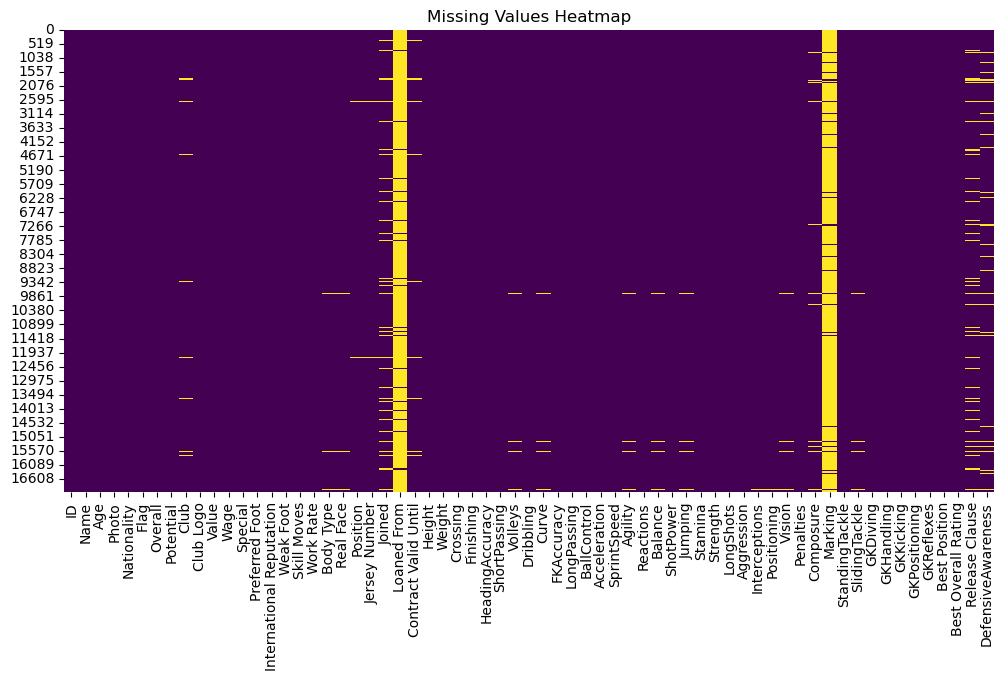

In [287]:
#heatmap of missing values shows only club has missing values of type MCAR (Missing Completely at Random)
#I want to understand the pattern of missingness, why is the data missing?
#nan values in "loaned from" column are because the player is not on loan
#nan values in "club" column are because the player is a free agent
plt.figure(figsize=(12, 6))
sns.heatmap(pandas_df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Data Cleaning

In [288]:
#dropping columns that are not useful for analysis
#these columns are images and logos links which do not add value to the analysis
col = ['Photo','Flag','Club Logo']
fifa = pandas_df.drop(columns = col, axis = 1)
fifa.shape

(17108, 62)

In [289]:
#Clean position column as it has some junk span classes data
#What is difference between position and best position?
#Convert value and wage to numeric
#What is the special column?
#Body type has easter egg values like "Messi" and "C. Ronaldo"
#Convert height and weight to numeric
#Convert work rate to categorical low, medium, high
#Convert joined date to datetime
#Find Loan Sharks from loaned from column

In [290]:
#Clean position column
import re

pattern = re.compile(r">([^<]+)$")  # capture everything between > and <

fifa["Position_clean"] = fifa["Position"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Position", "Position_clean", "Best Position"]].head(10))


                      Position Position_clean Best Position
0   <span class="pos pos24">RS             RS            ST
1  <span class="pos pos13">RCM            RCM           CAM
2  <span class="pos pos18">CAM            CAM           CAM
3   <span class="pos pos23">RW             RW            ST
4    <span class="pos pos7">LB             LB            LB
5    <span class="pos pos7">LB             LB            LB
6  <span class="pos pos11">LDM            LDM            CM
7  <span class="pos pos28">SUB            SUB           CDM
8   <span class="pos pos9">RDM            RDM           CDM
9  <span class="pos pos15">LCM            LCM            CM


In [291]:
#Number of players where Position != Best Position: 115
diff_df = fifa[fifa['Position_clean'] != fifa['Best Position']]
print(f"Number of players where Position != Best Position: {len(diff_df)}")
print(diff_df[['Name', 'Position_clean', 'Best Position']].head(10))

Number of players where Position != Best Position: 14555
              Name Position_clean Best Position
0        L. Suárez             RS            ST
1     K. De Bruyne            RCM           CAM
3     A. Griezmann             RW            ST
6         Paulinho            LDM            CM
7    R. Nainggolan            SUB           CDM
8       J. Kimmich            RDM           CDM
9     G. Wijnaldum            LCM            CM
10          E. Can            RCB            CB
11    Sergio Ramos            LCB            CB
12     L. Goretzka            LDM            CM


In [292]:
#Convert value and wage to numeric
def convert(df_value):
    try:
        # If already a float or int, return as is
        if isinstance(df_value, (float, int)):
            return df_value
        # If not a string, return 0
        if not isinstance(df_value, str):
            return 0
        # Remove currency symbol and commas
        s = df_value.replace('€', '').replace(',', '').strip().upper()
        if s == '':
            return 0
        # Handle suffix
        if s[-1] == 'M':
            value = float(s[:-1]) * 1_000_000
        elif s[-1] == 'K':
            value = float(s[:-1]) * 1_000
        else:
            value = float(s)
    except Exception:
        value = 0
    return value

fifa['Value'] = fifa['Value'].apply(convert)
fifa['Wage'] = fifa['Wage'].apply(convert)
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Position_clean
0,176580,L. Suárez,33,Uruguay,87,87,Atlético Madrid,31500000.0,115000.0,2316,...,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0,RS
1,192985,K. De Bruyne,29,Belgium,91,91,Manchester City,87000000.0,370000.0,2304,...,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0,RCM
2,212198,Bruno Fernandes,25,Portugal,87,90,Manchester United,63000000.0,195000.0,2303,...,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0,CAM
3,194765,A. Griezmann,29,France,87,87,FC Barcelona,50500000.0,290000.0,2288,...,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0,RW
4,224334,M. Acuña,28,Argentina,83,83,Sevilla FC,22000000.0,41000.0,2280,...,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0,LB


In [293]:
#What is the special column?
fifa['Special'].describe()

count    17108.000000
mean      1625.722995
std        263.503922
min        731.000000
25%       1484.000000
50%       1653.000000
75%       1810.000000
max       2316.000000
Name: Special, dtype: float64

count    17108.000000
mean      1625.722995
std        263.503922
min        731.000000
25%       1484.000000
50%       1653.000000
75%       1810.000000
max       2316.000000
Name: Special, dtype: float64


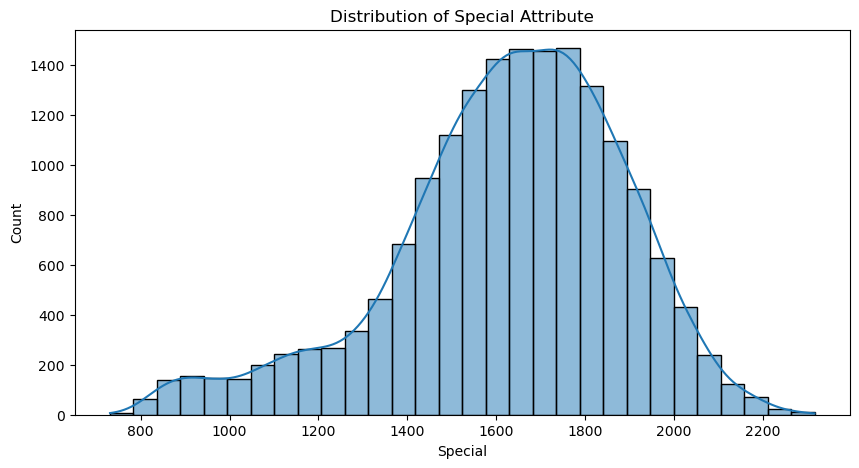

               Name  Special  Overall  Potential  \
0         L. Suárez     2316       87         87   
1      K. De Bruyne     2304       91         91   
2   Bruno Fernandes     2303       87         90   
3      A. Griezmann     2288       87         87   
4          M. Acuña     2280       83         83   
5       Alex Telles     2280       84         85   
6          Paulinho     2279       83         83   
7     R. Nainggolan     2270       83         83   
8        J. Kimmich     2269       88         90   
9      G. Wijnaldum     2267       85         85   

                             Club  
0                 Atlético Madrid  
1                 Manchester City  
2               Manchester United  
3                    FC Barcelona  
4                      Sevilla FC  
5                        FC Porto  
6  Guangzhou Evergrande Taobao FC  
7                           Inter  
8               FC Bayern München  
9                       Liverpool  


In [294]:
# Summary statistics for the Special column
print(fifa['Special'].describe())

# Distribution plot for Special
plt.figure(figsize=(10,5))
sns.histplot(fifa['Special'], bins=30, kde=True)
plt.title('Distribution of Special Attribute')
plt.xlabel('Special')
plt.show()

# Top 10 players by Special
top_special = fifa.nlargest(10, 'Special')[['Name', 'Special', 'Overall', 'Potential', 'Club']]
print(top_special)

In [295]:
# Special column is a column which is just like overall but with more granularity
# It ranges from 47 to 2200 with mean of 611. It is likely a composite score based on various attributes
# It helps to differentiate players with same overall rating by providing a more detailed score

In [296]:
# Body type has easter egg values like "Messi" and "C. Ronaldo"
# Unique values in Body Type column
print(fifa['Body Type'].unique())

# Find rows with Body Type as 'Messi' or 'C. Ronaldo'
easter_eggs = fifa[fifa['Body Type'].isin(['Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Akinfenwa', 'Courtois'])]
print(easter_eggs[['Name', 'Body Type', 'Overall', 'Special', 'Club']])

['PLAYER_BODY_TYPE_374' 'PLAYER_BODY_TYPE_321' 'Lean (170-185)'
 'PLAYER_BODY_TYPE_266' 'Stocky (170-185)' 'PLAYER_BODY_TYPE_286'
 'Normal (170-185)' 'PLAYER_BODY_TYPE_282' 'PLAYER_BODY_TYPE_308'
 'Stocky (185+)' 'PLAYER_BODY_TYPE_352' 'PLAYER_BODY_TYPE_275'
 'PLAYER_BODY_TYPE_267' 'Normal (185+)' 'PLAYER_BODY_TYPE_330' 'Messi'
 'PLAYER_BODY_TYPE_377' 'PLAYER_BODY_TYPE_268' 'C. Ronaldo'
 'PLAYER_BODY_TYPE_358' 'PLAYER_BODY_TYPE_316' 'PLAYER_BODY_TYPE_285'
 'PLAYER_BODY_TYPE_357' 'Mohamed Salah' 'PLAYER_BODY_TYPE_353'
 'PLAYER_BODY_TYPE_315' 'Stocky (170-)' 'PLAYER_BODY_TYPE_313'
 'Lean (170-)' 'PLAYER_BODY_TYPE_276' 'PLAYER_BODY_TYPE_278'
 'PLAYER_BODY_TYPE_307' 'Normal (170-)' 'PLAYER_BODY_TYPE_367'
 'PLAYER_BODY_TYPE_317' 'PLAYER_BODY_TYPE_264' 'PLAYER_BODY_TYPE_341'
 'Neymar' 'Normal (190+)' 'Lean (185+)' 'PLAYER_BODY_TYPE_368'
 'PLAYER_BODY_TYPE_318' 'PLAYER_BODY_TYPE_311' 'PLAYER_BODY_TYPE_251'
 'PLAYER_BODY_TYPE_283' 'PLAYER_BODY_TYPE_345' 'PLAYER_BODY_TYPE_346'
 'PLAYER_BODY_TYP

In [297]:
#PLAYER_BODY_TYPE_374 Might point us to the body type of the player at index 374
#Similarly for others too, i think we can map these values to actual body types then clean them
#I can code up something to fix this according to my inference

In [298]:
fifa['Body Type']

0        PLAYER_BODY_TYPE_374
1        PLAYER_BODY_TYPE_321
2              Lean (170-185)
3        PLAYER_BODY_TYPE_266
4            Stocky (170-185)
                 ...         
17103           Normal (185+)
17104           Normal (185+)
17105           Normal (185+)
17106             Lean (185+)
17107        Normal (170-185)
Name: Body Type, Length: 17108, dtype: object

In [299]:
# Extract only the numeric part from the Body Type column (if any)
import re

# Regex to extract numbers from patterns like PLAYER_BODY_TYPE_374
pattern = r'PLAYER_BODY_TYPE_(\d+)'

# Test the pattern on Body Type column
test_samples = fifa['Body Type'].head(20)
print("Sample Body Type values:")
for i, body_type in enumerate(test_samples):
    if pd.notna(body_type):
        match = re.search(pattern, str(body_type))
        if match:
            number = match.group(1)  # group(1) gets the captured number
            print(f"  {body_type} -> {number}")
        else:
            print(f"  {body_type} -> No match")

fifa['Body Type Extra1'] = fifa['Body Type'].str.extract(r'PLAYER_BODY_TYPE_(\d+)')

fifa['Body Type Extra1'].head(20)

Sample Body Type values:
  PLAYER_BODY_TYPE_374 -> 374
  PLAYER_BODY_TYPE_321 -> 321
  Lean (170-185) -> No match
  PLAYER_BODY_TYPE_266 -> 266
  Stocky (170-185) -> No match
  PLAYER_BODY_TYPE_286 -> 286
  Normal (170-185) -> No match
  PLAYER_BODY_TYPE_282 -> 282
  Lean (170-185) -> No match
  PLAYER_BODY_TYPE_308 -> 308
  Stocky (185+) -> No match
  PLAYER_BODY_TYPE_352 -> 352
  PLAYER_BODY_TYPE_275 -> 275
  Lean (170-185) -> No match
  Normal (170-185) -> No match
  PLAYER_BODY_TYPE_267 -> 267
  Normal (185+) -> No match
  PLAYER_BODY_TYPE_330 -> 330
  Messi -> No match
  PLAYER_BODY_TYPE_377 -> 377


0     374
1     321
2     NaN
3     266
4     NaN
5     286
6     NaN
7     282
8     NaN
9     308
10    NaN
11    352
12    275
13    NaN
14    NaN
15    267
16    NaN
17    330
18    NaN
19    377
Name: Body Type Extra1, dtype: object

In [300]:
# Map Body Type indices to actual body types from those player positions
def map_body_type_by_index(index):
    """
    Map the extracted index number to the actual body type of the player at that index
    """
    try:
        if pd.isna(index):
            return np.nan
        
        idx = int(index)  # Convert to integer index
        
        # Check if index is within bounds
        if 0 <= idx < len(fifa):
            # Get the body type of the player at that index
            body_type_at_index = fifa['Body Type'].iloc[idx]
            
            # Check if it's a valid body type (not another PLAYER_BODY_TYPE pattern)
            if pd.notna(body_type_at_index) and not str(body_type_at_index).startswith('PLAYER_BODY_TYPE_'):
                return body_type_at_index
            else:
                return 'Unknown'  # If the referenced player also has encoded body type
        else:
            return 'Out of Range'  # Index out of bounds
            
    except (ValueError, TypeError):
        return np.nan  # Non-numeric or invalid index

# Apply the mapping function
fifa['Body Type Mapped'] = fifa['Body Type Extra1'].apply(map_body_type_by_index)

# Show results
print("Mapping results:")
print(fifa[['Body Type', 'Body Type Extra1', 'Body Type Mapped']].head(20))

# Show some specific examples where mapping worked
mapped_examples = fifa[fifa['Body Type Mapped'].notna() & (fifa['Body Type Mapped'] != 'Unknown')][
    ['Body Type', 'Body Type Extra1', 'Body Type Mapped']
].head(10)
print("\nSuccessful mapping examples:")
print(mapped_examples)

Mapping results:
               Body Type Body Type Extra1  Body Type Mapped
0   PLAYER_BODY_TYPE_374              374    Lean (170-185)
1   PLAYER_BODY_TYPE_321              321  Normal (170-185)
2         Lean (170-185)              NaN               NaN
3   PLAYER_BODY_TYPE_266              266  Normal (170-185)
4       Stocky (170-185)              NaN               NaN
5   PLAYER_BODY_TYPE_286              286  Normal (170-185)
6       Normal (170-185)              NaN               NaN
7   PLAYER_BODY_TYPE_282              282  Normal (170-185)
8         Lean (170-185)              NaN               NaN
9   PLAYER_BODY_TYPE_308              308  Normal (170-185)
10         Stocky (185+)              NaN               NaN
11  PLAYER_BODY_TYPE_352              352    Lean (170-185)
12  PLAYER_BODY_TYPE_275              275     Normal (185+)
13        Lean (170-185)              NaN               NaN
14      Normal (170-185)              NaN               NaN
15  PLAYER_BODY_TYPE_26

In [301]:
# Substitute PLAYER_BODY_TYPE_ values in Body Type with respective values in the Body Type Mapped feature

def substitute_body_type(row):
    """
    Replace PLAYER_BODY_TYPE_ values with mapped body types where available
    """
    original_body_type = row['Body Type']
    mapped_body_type = row['Body Type Mapped']
    
    # If original starts with PLAYER_BODY_TYPE_ and we have a valid mapping
    if (pd.notna(original_body_type) and 
        str(original_body_type).startswith('PLAYER_BODY_TYPE_') and
        pd.notna(mapped_body_type) and 
        mapped_body_type not in ['Unknown', 'Out of Range']):
        return mapped_body_type
    else:
        return original_body_type

# Apply the substitution
fifa['Body Type Substituted'] = fifa.apply(substitute_body_type, axis=1)

# Show the results
print("Before and after substitution:")
substitution_examples = fifa[fifa['Body Type'].str.startswith('PLAYER_BODY_TYPE_', na=False)][
    ['Body Type', 'Body Type Extra1', 'Body Type Mapped', 'Body Type Substituted']
].head(15)
print(substitution_examples)

# Count successful substitutions
original_encoded = fifa['Body Type'].str.startswith('PLAYER_BODY_TYPE_', na=False).sum()
successful_substitutions = fifa[
    (fifa['Body Type'].str.startswith('PLAYER_BODY_TYPE_', na=False)) &
    (fifa['Body Type Mapped'].notna()) &
    (~fifa['Body Type Mapped'].isin(['Unknown', 'Out of Range']))
].shape[0]

print(f"\nSubstitution Summary:")
print(f"Total PLAYER_BODY_TYPE_ entries: {original_encoded}")
print(f"Successful substitutions: {successful_substitutions}")
print(f"Success rate: {successful_substitutions/original_encoded*100:.1f}%")

#Manually apply substitution to index 345 with Body Type as "Lean (185+)"
fifa.at[345, 'Body Type Substituted'] = 'Lean (185+)'

# Show unique values in the substituted column
print(f"\nUnique body types after substitution:")
print(fifa['Body Type Substituted'].value_counts().head(15))

Before and after substitution:
               Body Type Body Type Extra1  Body Type Mapped  \
0   PLAYER_BODY_TYPE_374              374    Lean (170-185)   
1   PLAYER_BODY_TYPE_321              321  Normal (170-185)   
3   PLAYER_BODY_TYPE_266              266  Normal (170-185)   
5   PLAYER_BODY_TYPE_286              286  Normal (170-185)   
7   PLAYER_BODY_TYPE_282              282  Normal (170-185)   
9   PLAYER_BODY_TYPE_308              308  Normal (170-185)   
11  PLAYER_BODY_TYPE_352              352    Lean (170-185)   
12  PLAYER_BODY_TYPE_275              275     Normal (185+)   
15  PLAYER_BODY_TYPE_267              267  Normal (170-185)   
17  PLAYER_BODY_TYPE_330              330       Lean (185+)   
19  PLAYER_BODY_TYPE_377              377    Lean (170-185)   
21  PLAYER_BODY_TYPE_268              268  Normal (170-185)   
23  PLAYER_BODY_TYPE_358              358  Normal (170-185)   
25  PLAYER_BODY_TYPE_316              316  Stocky (170-185)   
28  PLAYER_BODY_TYPE_285

In [302]:
print(fifa.at[345, 'Body Type Substituted'])

Lean (185+)


In [303]:
print(fifa['Body Type Substituted'].value_counts())

# Get all PLAYER_BODY_TYPE_ entries that still remain
remaining_encoded = fifa['Body Type Substituted'][fifa['Body Type Substituted'].str.startswith('PLAYER_BODY_TYPE_', na=False)]
remaining_encoded_list = remaining_encoded.unique().tolist()

print(f"\nRemaining PLAYER_BODY_TYPE_ entries ({len(remaining_encoded_list)}):")
print(remaining_encoded_list)

# Extract the indices (numbers) from the remaining encoded body types
remaining_indices = []
for body_type in remaining_encoded_list:
    if 'PLAYER_BODY_TYPE_' in body_type:
        index = body_type.replace('PLAYER_BODY_TYPE_', '')
        remaining_indices.append(int(index))

print(f"\nExtracted indices: {sorted(remaining_indices)}")

# Show what body types these indices point to
print(f"\nWhat these indices point to:")
for idx in sorted(remaining_indices):
    if 0 <= idx < len(fifa):
        body_type_at_idx = fifa['Body Type'].iloc[idx]
        name_at_idx = fifa['Name'].iloc[idx]
        print(f"Index {idx}: '{body_type_at_idx}' (Player: {name_at_idx})")
    else:
        print(f"Index {idx}: Out of range")

# Get the row indices where these encoded body types appear
print(f"\nRow indices where these encoded body types appear:")
for encoded_type in remaining_encoded_list:
    mask = fifa['Body Type Substituted'] == encoded_type
    row_indices = fifa[mask].index.tolist()
    print(f"{encoded_type}: appears at row indices {row_indices}")

# Manually apply substitutions based on what we found
indices_to_fix = [258, 265, 279, 302, 324, 338, 345, 346, 355, 361]

print(f"\nManually fixing indices: {indices_to_fix}")
for idx in indices_to_fix:
    if 0 <= idx < len(fifa):
        reference_body_type = fifa['Body Type'].iloc[idx]
        # Find all rows that reference this index
        encoded_pattern = f'PLAYER_BODY_TYPE_{idx}'
        mask = fifa['Body Type Substituted'] == encoded_pattern
        fifa.loc[mask, 'Body Type Substituted'] = reference_body_type
        print(f"Fixed PLAYER_BODY_TYPE_{idx} → '{reference_body_type}'")

# Apply clean_body_type function (assuming it exists from earlier)
def clean_body_type(body_type):
    if pd.isna(body_type):
        return np.nan
    body_type = body_type.strip()
    # List of known body types including easter eggs
    known_types = [
        'Lean', 'Normal', 'Stocky', 'Muscular', 'Average',
        'Akinfenwa', 'Messi', 'C. Ronaldo', 'Shaqiri', 'Neymar', 'Courtois', 'Mohamed Salah'
    ]
    # If body_type starts with 'PLAYER_BODY_TYPE_', set as 'Unknown'
    if body_type.startswith('PLAYER_BODY_TYPE_'):
        return 'Unknown'
    # Extract main type before any parenthesis or space
    import re
    main_type = re.match(r'^(\w+)', body_type)
    if body_type in known_types:
        return body_type
    if main_type and main_type.group(1) in known_types:
        return main_type.group(1)
    if main_type:
        return main_type.group(1)
    return body_type

fifa['Body Type Clean'] = fifa['Body Type Substituted'].apply(clean_body_type)

print(f"\nFinal Body Type Clean value counts:")
print(fifa['Body Type Clean'].value_counts())

Body Type Substituted
Normal (170-185)        5762
Lean (170-185)          3869
Normal (185+)           3587
Lean (185+)             1756
Normal (170-)            610
Stocky (170-185)         596
Lean (170-)              424
Stocky (185+)            336
Stocky (170-)            120
Normal (190+)              6
Messi                      1
C. Ronaldo                 1
Mohamed Salah              1
Neymar                     1
PLAYER_BODY_TYPE_345       1
PLAYER_BODY_TYPE_346       1
PLAYER_BODY_TYPE_279       1
PLAYER_BODY_TYPE_355       1
PLAYER_BODY_TYPE_361       1
PLAYER_BODY_TYPE_302       1
PLAYER_BODY_TYPE_258       1
Shaqiri                    1
PLAYER_BODY_TYPE_324       1
PLAYER_BODY_TYPE_338       1
PLAYER_BODY_TYPE_265       1
Akinfenwa                  1
Courtois                   1
Name: count, dtype: int64

Remaining PLAYER_BODY_TYPE_ entries (10):
['PLAYER_BODY_TYPE_345', 'PLAYER_BODY_TYPE_346', 'PLAYER_BODY_TYPE_279', 'PLAYER_BODY_TYPE_355', 'PLAYER_BODY_TYPE_361', 'PLAY

In [304]:
# Option 1: Using nunique()
fifa['Body Type Clean'].nunique()

#show those unique values
fifa['Body Type Clean'].unique()

# Show indices of Unknown and nan
print("Indices where Body Type Clean is 'Unknown':")
unknown_indices = fifa[fifa['Body Type Clean'] == 'Unknown'].index.tolist()
print(f"Unknown indices: {unknown_indices}")
print(f"Count of Unknown: {len(unknown_indices)}")

print("\nIndices where Body Type Clean is NaN:")
nan_indices = fifa[fifa['Body Type Clean'].isna()].index.tolist()
print(f"NaN indices: {nan_indices}")
print(f"Count of NaN: {len(nan_indices)}")

# Show the actual data for these problematic entries
if unknown_indices:
    print(f"\nSample data for Unknown entries:")
    print(fifa.loc[unknown_indices[:5], ['Name', 'Body Type Clean']].head())

if nan_indices:
    print(f"\nSample data for NaN entries:")
    print(fifa.loc[nan_indices[:5], ['Name', 'Body Type Clean']].head())

# Show value counts including NaN
print(f"\nComplete value counts (including NaN):")
print(fifa['Body Type Clean'].value_counts(dropna=False))



Indices where Body Type Clean is 'Unknown':
Unknown indices: [87, 88, 123, 146, 158, 232, 302, 586, 868, 962]
Count of Unknown: 10

Indices where Body Type Clean is NaN:
NaN indices: [8886, 9751, 9932, 10337, 10619, 10710, 11173, 11329, 11549, 11563, 12370, 12877, 13314, 13773, 14810, 14893, 15081, 15602, 15779, 15806, 16116, 16521, 16571, 16895, 17009]
Count of NaN: 25

Sample data for Unknown entries:
             Name Body Type Clean
87    A. Di María         Unknown
88    M. Verratti         Unknown
123       M. Reus         Unknown
146      Carvajal         Unknown
158    M. Sissoko         Unknown

Sample data for NaN entries:
                  Name Body Type Clean
8886           08 Cafu             NaN
9751       10 Sylvinho             NaN
9932    08 P. Kluivert             NaN
10337     10 M. Bordon             NaN
10619    08 C. Ramelow             NaN

Complete value counts (including NaN):
Body Type Clean
Normal           9965
Lean             6049
Stocky           1052
NaN

In [305]:
# Show Body Type values for specific indices
# You can replace this list with any indices you want to check
indices_to_check = [87, 88, 123, 146, 158, 232, 302, 586, 868, 962]  # Example: Unknown indices

print("Body Type values for specified indices:")
print("-" * 50)
for idx in indices_to_check:
    if 0 <= idx < len(fifa):
        body_type_value = fifa['Body Type Clean'].iloc[idx]
        player_name = fifa['Name'].iloc[idx]
        print(f"Index {idx}: '{body_type_value}' (Player: {player_name})")
    else:
        print(f"Index {idx}: Out of range")

# Alternative: Show all Body Type values for a list of indices at once
print(f"\nBody Type Clean values for indices {indices_to_check}:")
result_df = fifa.loc[indices_to_check, ['Name', 'Body Type Clean']]
print(result_df)

# If you want to check the original Body Type as well
print(f"\nComparison of original vs cleaned Body Type:")
comparison_df = fifa.loc[indices_to_check, ['Name', 'Body Type', 'Body Type Clean']]
print(comparison_df)

Body Type values for specified indices:
--------------------------------------------------
Index 87: 'Unknown' (Player:  A. Di María)
Index 88: 'Unknown' (Player:  M. Verratti)
Index 123: 'Unknown' (Player:  M. Reus)
Index 146: 'Unknown' (Player:  Carvajal)
Index 158: 'Unknown' (Player:  M. Sissoko)
Index 232: 'Unknown' (Player:  A. Sánchez)
Index 302: 'Unknown' (Player:  W. Ben Yedder)
Index 586: 'Unknown' (Player:  R. Mahrez)
Index 868: 'Unknown' (Player:  L. Insigne)
Index 962: 'Unknown' (Player:  Piqué)

Body Type Clean values for indices [87, 88, 123, 146, 158, 232, 302, 586, 868, 962]:
               Name Body Type Clean
87      A. Di María         Unknown
88      M. Verratti         Unknown
123         M. Reus         Unknown
146        Carvajal         Unknown
158      M. Sissoko         Unknown
232      A. Sánchez         Unknown
302   W. Ben Yedder         Unknown
586       R. Mahrez         Unknown
868      L. Insigne         Unknown
962           Piqué         Unknown

Comp

In [306]:
fifa['Height'] = pandas_df['Height']
fifa['Weight'] = pandas_df['Weight']
print(fifa[['Height', 'Weight']].head(10))

  Height  Weight
0    6'0  190lbs
1   5'11  154lbs
2   5'10  152lbs
3    5'9  161lbs
4    5'8  152lbs
5   5'11  157lbs
6    6'0  176lbs
7    5'9  143lbs
8    5'9  161lbs
9    5'9  152lbs



In [307]:
def height_conversion(height):
    try:
        if pd.isna(height):
            return np.nan
        # Remove spaces and handle strings like "5'9"
        height_str = str(height).replace(" ", "")
        if "'" in height_str:
            ft, inch = height_str.split("'")
            ft = float(ft)
            inch = float(inch) if inch else 0
        else:
            # If only feet provided, no inches
            ft = float(height_str)
            inch = 0
        total_cm = (ft * 12 + inch) * 2.54
        return total_cm
    except Exception:
        return np.nan

fifa['Height'] = fifa['Height'].apply(height_conversion)
fifa['Height'] = fifa['Height'].fillna(fifa['Height'].mean())
print(fifa['Height'].head())

0    182.88
1    180.34
2    177.80
3    175.26
4    172.72
Name: Height, dtype: float64


In [308]:
value = float(fifa['Weight'][0][0:-3])*0.453592
print('%0.2f'%value)

#in kg
def weight_conversion(weight):
    if(pd.isna(weight))!= True:
        w = int(weight[0:-3])*0.453592
        return w
    else:
        return weight

fifa['Weight'] = fifa['Weight'].apply(weight_conversion)

fifa['Weight'] = fifa['Weight'].fillna(value = fifa['Weight'].mean())

fifa['Weight'][13230:13239]

86.18


13230    69.853168
13231    79.832192
13232    76.203456
13233    81.192968
13234    68.945984
13235    83.007336
13236    69.853168
13237    83.914520
13238    82.100152
Name: Weight, dtype: float64

In [309]:
#Convert height and weight to numeric, i.e into cms and kgs respectfully
print(fifa[['Height', 'Weight']].head(10))

   Height     Weight
0  182.88  86.182480
1  180.34  69.853168
2  177.80  68.945984
3  175.26  73.028312
4  172.72  68.945984
5  180.34  71.213944
6  182.88  79.832192
7  175.26  64.863656
8  175.26  73.028312
9  175.26  68.945984


In [310]:
fifa['Joined'] = pandas_df['Joined']

In [311]:
#Convert joined date to datetime
def date_conversion(date):
    if pd.isna(date):
        return np.nan
    if isinstance(date, str):
        try:
            # Try parsing with pandas to_datetime, dayfirst for European format
            dt = pd.to_datetime(date, errors='coerce', dayfirst=True)
            if pd.isna(dt):
                # Try parsing with common formats manually
                for fmt in ['%b %d, %Y', '%d %b %Y', '%Y-%m-%d', '%d/%m/%Y', '%m/%d/%Y']:
                    try:
                        dt = pd.to_datetime(date, format=fmt, errors='coerce')
                        if not pd.isna(dt):
                            return dt
                    except Exception:
                        continue
            return dt
        except Exception:
            return np.nan
    return np.nan

fifa['Joined'] = fifa['Joined'].apply(date_conversion)
print(fifa['Joined'].head(10))

0   2020-09-25
1   2015-08-30
2   2020-01-30
3   2019-07-12
4   2020-09-14
5   2016-07-13
6   2019-01-15
7   2018-07-01
8   2015-07-01
9   2016-07-22
Name: Joined, dtype: datetime64[ns]


In [312]:
#Convert work rate to categorical low, medium, high
def work_rate_conversion(rate):
    if pd.isna(rate):
        return (np.nan, np.nan)
    if isinstance(rate, str) and '/' in rate:
        try:
            attack, defense = rate.split('/')
            return (attack.strip(), defense.strip())
        except Exception:
            return (np.nan, np.nan)
    return (np.nan, np.nan)

fifa[['Attacking Work Rate', 'Defensive Work Rate']] = fifa['Work Rate'].apply(work_rate_conversion).apply(pd.Series)
fifa[['Work Rate', 'Attacking Work Rate', 'Defensive Work Rate']].head(10)

,Work Rate,Attacking Work Rate,Defensive Work Rate
0,High/ Medium,High,Medium
1,High/ High,High,High
2,High/ High,High,High
3,Medium/ Medium,Medium,Medium
4,High/ High,High,High
5,High/ High,High,High
6,High/ High,High,High
7,High/ High,High,High
8,High/ Medium,High,Medium
9,High/ High,High,High


In [313]:
#Clean the loaned from column
import re

pattern = re.compile(r">(.*?)<")  # capture everything between > and <

fifa["Loaned From_clean"] = fifa["Loaned From"].apply(
    lambda x: pattern.search(str(x)).group(1) if pd.notna(x) and pattern.search(str(x)) else None
)

print(fifa[["Loaned From", "Loaned From_clean"]].head(10))

#it will show Nan/None for players who are not on loan
#other unique values are clubs from which players are loaned come later up in the dataset

  Loaned From Loaned From_clean
0         NaN              None
1         NaN              None
2         NaN              None
3         NaN              None
4         NaN              None
5         NaN              None
6         NaN              None
7         NaN              None
8         NaN              None
9         NaN              None


In [314]:
#Find Loan Sharks from loaned from column
fifa['Loaned From_clean'].value_counts().head(10)

Loaned From_clean
SL Benfica          15
Manchester City     13
Villarreal CF       13
Arsenal             13
Chelsea             12
LOSC Lille          12
Real Madrid         11
Inter               11
Lazio               10
SV Werder Bremen    10
Name: count, dtype: int64

## Final Fifa Dataset Looks like

In [315]:
# Drop Work Rate, body Type, Position, Loaned From as we cleaned them and have better dataset columns now
cols_to_drop = ['Work Rate', 'Body Type', 'Position', 'Loaned From']
fifa = fifa.drop(columns=cols_to_drop)
print(fifa.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness', 'Position_clean', 'Body Type Extra1',
       'Body Type Mapped', 'Body Type Substituted', 'Body Type Clean',
     

In [316]:
# Drop 'Body Type Extra1','Body Type Mapped', 'Body Type Substituted' as we cleaned them and have better dataset columns now
cols_to_drop = ['Body Type Extra1', 'Body Type Mapped', 'Body Type Substituted']
fifa = fifa.drop(columns=cols_to_drop)
print(fifa.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness', 'Position_clean', 'Body Type Clean',
       'Attacking Work Rate', 'Defensive Work Rate', 'Loaned From_clean'],
  

In [317]:
fifa.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Position_clean,Body Type Clean,Attacking Work Rate,Defensive Work Rate,Loaned From_clean
0,176580,L. Suárez,33,Uruguay,87,87,Atlético Madrid,31500000.0,115000.0,2316,...,37.0,ST,87.0,€64.6M,57.0,RS,Lean,High,Medium,None
1,192985,K. De Bruyne,29,Belgium,91,91,Manchester City,87000000.0,370000.0,2304,...,13.0,CAM,91.0,€161M,68.0,RCM,Normal,High,High,None
2,212198,Bruno Fernandes,25,Portugal,87,90,Manchester United,63000000.0,195000.0,2303,...,14.0,CAM,88.0,€124.4M,72.0,CAM,Lean,High,High,None
3,194765,A. Griezmann,29,France,87,87,FC Barcelona,50500000.0,290000.0,2288,...,14.0,ST,87.0,€103.5M,59.0,RW,Normal,Medium,Medium,None
4,224334,M. Acuña,28,Argentina,83,83,Sevilla FC,22000000.0,41000.0,2280,...,14.0,LB,83.0,€46.2M,79.0,LB,Stocky,High,High,None
5,212462,Alex Telles,27,Brazil,84,85,FC Porto,31000000.0,23000.0,2280,...,14.0,LB,84.0,€64.3M,80.0,LB,Normal,High,High,None
6,187961,Paulinho,31,Brazil,83,83,Guangzhou Evergrande Taobao FC,22000000.0,39000.0,2279,...,8.0,CM,83.0,€35.2M,80.0,LDM,Normal,High,High,None
7,178518,R. Nainggolan,32,Belgium,83,83,Inter,20000000.0,125000.0,2270,...,11.0,CDM,85.0,€33M,83.0,SUB,Normal,High,High,None
8,212622,J. Kimmich,25,Germany,88,90,FC Bayern München,65000000.0,145000.0,2269,...,15.0,CDM,88.0,€112.1M,82.0,RDM,Lean,High,Medium,None
9,181291,G. Wijnaldum,29,Netherlands,85,85,Liverpool,37000000.0,150000.0,2267,...,6.0,CM,85.0,€68.5M,78.0,LCM,Normal,High,High,None


In [318]:
skim(fifa)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 17108  │ │ float64     │ 44    │                                                          │
│ │ Number of columns │ 63     │ │ string      │ 13    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 5     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column    ┃ NA    ┃ NA %      ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ ID        │     0 │         0 │  221400 │   36030 │     2 │ 205500 │ 230400 │  245400 │    259100 │    ▁▃▇ │  │
│ │ Age       │     0 │         0 │   25.05 │   4.916 │    16 │     21 │     24 │      28 │        53 │  ▇▇▅▁  │  │
│ │ Overall   │     0 │         0 │   66.78 │   7.019 │    38 │     62 │     67 │      72 │        93 │  ▁▆▇▂  │  │
│ │ Potential │     0 │         0 │   72.55 │   5.738 │    46 │     69 │     72 │      76 │        95 │  ▁▅▇▂  │  │
│ │ Value     │     0 │         0 │ 2566000 │ 5377000 │     0 │ 375000 │ 800000 │ 2400000 │ 105500000 │   ▇    │  │
│ │ Wage      │     0 │         0 │   10460 │   21120 │     0 │   1000 │   3000 │   10000 │    560000 │   ▇    │  │
│ │ Special   │     0 │         0 │    1626 │   263.5 │   731 │   1484 │   1653 │    1810 │      2316 │ ▁▁▃▇▅▁ │  │
│ │ Internati │     0 │         0 │   1.148 │  0.4558 │     1 │      1 │      1 │       1 │         5 │   ▇▁   │  │
│ │ onal      │       │           │         │         │       │        │        │         │           │        │  │
│ │ Reputatio │       │           │         │         │       │        │        │         │           │        │  │
│ │ n         │       │           │         │         │       │        │        │         │           │        │  │
│ │ Weak Foot │     0 │         0 │   2.982 │  0.6747 │     1 │      3 │      3 │       3 │         5 │  ▃ ▇▂  │  │
│ │ Skill     │     0 │         0 │   2.446 │  0.7803 │     1 │      2 │      2 │       3 │         5 │ ▂▇ ▇▁  │  │
│ │ Moves     │       │           │         │         │       │        │        │         │           │        │  │
│ │ Jersey    │    20 │ 0.1169043 │   20.76 │   17.19 │     1 │      9 │     18 │      27 │        99 │  ▇▆▁   │  │
│ │ Number    │       │ 722235211 │         │         │       │        │        │         │           │        │  │
│ │           │       │         7 │         │         │       │        │        │         │           │        │  │
│ │ Height    │     0 │         0 │   181.2 │   6.866 │ 154.9 │  175.3 │  180.3 │   185.4 │     205.7 │  ▁▅▇▂  │  │
│ │ Weight    │     0 │         0 │   75.06 │   7.121 │  49.9 │  69.85 │  74.84 │   79.83 │     110.2 │   ▅▇▃  │  │
│ │ Crossing  │     0 │         0 │   51.36 │   17.95 │     6 │     40 │     55 │      65 │        94 │ ▂▂▅▇▅  │  │
│ │ Finishing │     0 │         0 │   47.72 │   19.46 │ 

## Graphs(temp)

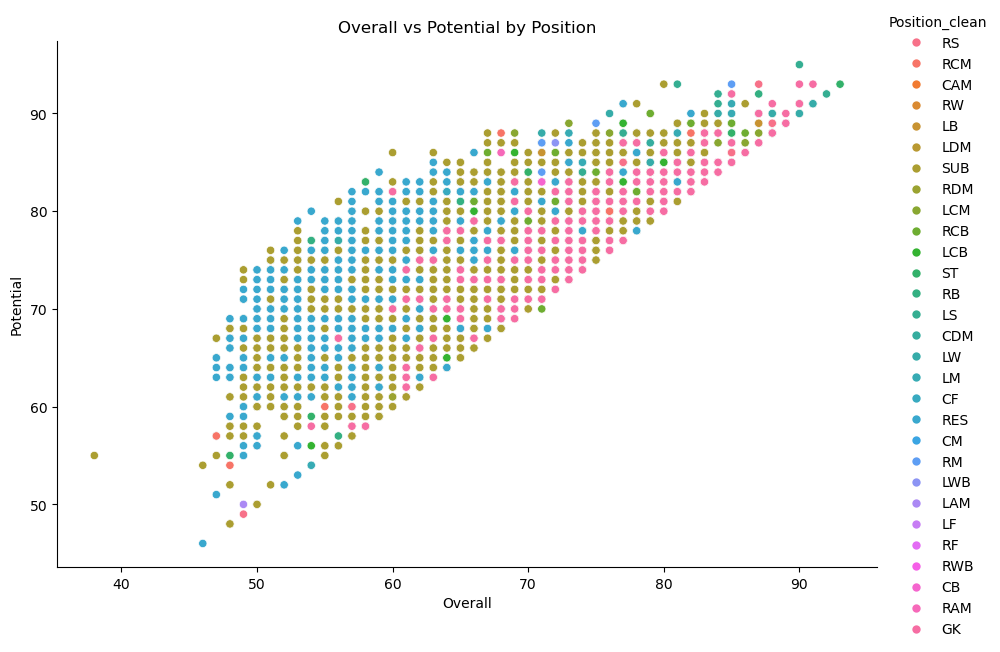

In [319]:
sns.relplot(data=fifa, x='Overall', y='Potential', hue='Position_clean', kind='scatter', height=6, aspect=1.5)
plt.title('Overall vs Potential by Position')
plt.show()

In [320]:
#highest potential players
top_potential = pandas_df.nlargest(10, 'Potential')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Potential:")
print(top_potential)

Top 10 Players by Potential:
                       Name  Overall  Potential                 Club   Wage
122               K. Mbappé       90         95  Paris Saint-Germain  €160K
18                 L. Messi       93         93         FC Barcelona  €560K
421              João Félix       81         93      Atlético Madrid   €51K
438              K. Havertz       85         93              Chelsea  €105K
1016              J. Sancho       87         93    Borussia Dortmund   €82K
2010           Vinícius Jr.       80         93          Real Madrid   €95K
13611         M. ter Stegen       90         93         FC Barcelona  €260K
14060              J. Oblak       91         93      Atlético Madrid  €125K
22        Cristiano Ronaldo       92         92             Juventus  €220K
25      T. Alexander-Arnold       87         92            Liverpool  €110K


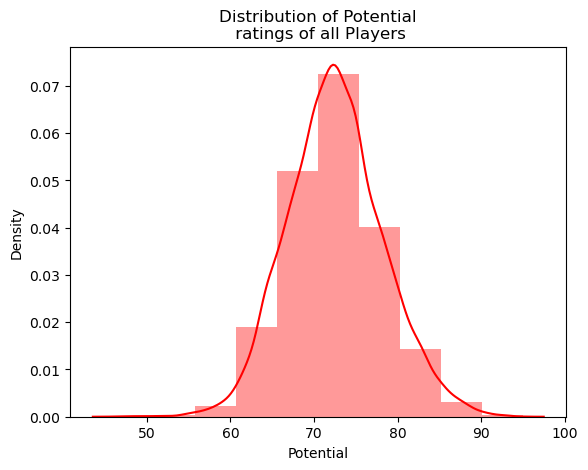

In [321]:
# Distribution of Potential ratings
sns.distplot(fifa['Potential'], bins=10, color='r')
plt.title("Distribution of Potential\n ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [322]:
#highest overall players
top_overall = pandas_df.nlargest(10, 'Overall')[['Name', 'Overall', 'Potential', 'Club', 'Wage']]
print("Top 10 Players by Overall:")
print(top_overall)

Top 10 Players by Overall:
                     Name  Overall  Potential                 Club   Wage
18               L. Messi       93         93         FC Barcelona  €560K
22      Cristiano Ronaldo       92         92             Juventus  €220K
1            K. De Bruyne       91         91      Manchester City  €370K
44         R. Lewandowski       91         91    FC Bayern München  €240K
70              Neymar Jr       91         91  Paris Saint-Germain  €270K
14060            J. Oblak       91         93      Atlético Madrid  €125K
31               M. Salah       90         90            Liverpool  €250K
38                S. Mané       90         90            Liverpool  €250K
122             K. Mbappé       90         95  Paris Saint-Germain  €160K
204           V. van Dijk       90         91            Liverpool  €210K


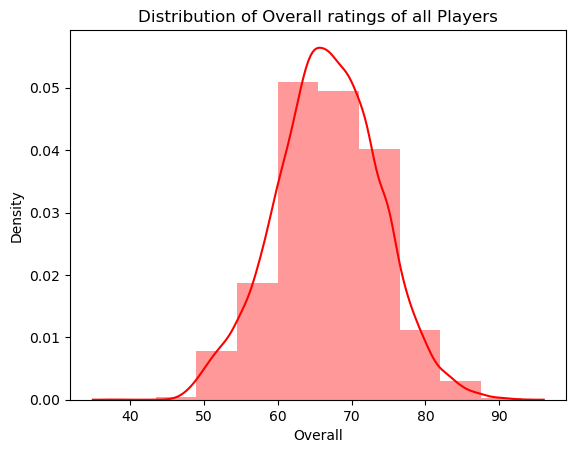

In [323]:
# Distribution of Overall ratings
sns.distplot(fifa['Overall'], bins=10, color='r')
plt.title("Distribution of Overall ratings of all Players")
plt.savefig("Distribution.png")
plt.show()

In [324]:
# Save the final dataframe to a CSV file
fifa.to_csv('C:\\Users\\admin\\OneDrive\\Documents\\GitHub\\Plotting\\fifa_dataset_cleaned\\fifa_final21.csv', index=False)